In [35]:
import numpy as np
import s3fs
import requests
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt 


In [33]:
def print_csv_names(bucket_name, file_name):
    path_to_file = f'../data/{bucket_name}/{file_name}'
    zip_file = zipfile.ZipFile(path_to_file)
    fs = {month: {} for month in month_list}
    zip_file.printdir()
    print('\n')
    for text_file in zip_file.infolist():
        if text_file.filename.endswith('.csv'):
            print(text_file.filename)

In [34]:
print_csv_names('tripdata', '2013-citibike-tripdata.zip')

File Name                                             Modified             Size
2013-citibike-tripdata/                        2024-02-22 00:06:56            0
2013-citibike-tripdata/4_April/                2024-02-14 10:09:16            0
2013-citibike-tripdata/12_December/            2024-02-22 00:03:04            0
2013-citibike-tripdata/.DS_Store               2024-02-22 00:07:16        12292
__MACOSX/2013-citibike-tripdata/._.DS_Store    2024-02-22 00:07:16          120
2013-citibike-tripdata/201309-citibike-tripdata.csv 2014-03-27 23:40:34    201965642
__MACOSX/2013-citibike-tripdata/._201309-citibike-tripdata.csv 2014-03-27 23:40:34          276
2013-citibike-tripdata/11_November/            2024-02-22 00:03:00            0
2013-citibike-tripdata/7_July/                 2024-02-22 00:02:38            0
2013-citibike-tripdata/201311-citibike-tripdata.csv 2014-03-27 23:43:44    131891356
__MACOSX/2013-citibike-tripdata/._201311-citibike-tripdata.csv 2014-03-27 23:43:44          27

In [48]:
def get_test_data():
    with zipfile.ZipFile('../data/tripdata/2013-citibike-tripdata.zip', 'r') as zip_file:
        month_df = pd.read_csv(zip_file.open('2013-citibike-tripdata/6_June/201306-citibike-tripdata_1.csv'), encoding='latin-1')
    return month_df

In [49]:
test_df = get_test_data()

In [57]:
test_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [113]:
test_df.dtypes
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             577703 non-null  int64         
 1   starttime                577703 non-null  datetime64[ns]
 2   stoptime                 577703 non-null  datetime64[ns]
 3   start station id         577703 non-null  int64         
 4   start station name       577703 non-null  object        
 5   start station latitude   577703 non-null  float64       
 6   start station longitude  577703 non-null  float64       
 7   end station id           559644 non-null  float64       
 8   end station name         559644 non-null  object        
 9   end station latitude     559644 non-null  float64       
 10  end station longitude    559644 non-null  float64       
 11  bikeid                   577703 non-null  int64         
 12  usertype        

In [130]:
test_df['starttime'] = pd.to_datetime(test_df['starttime'])
test_df['stoptime'] = pd.to_datetime(test_df['stoptime'])

test_df['usertype'] = test_df['usertype'].astype('category')
test_df['start station name'] = test_df['start station name'].astype('category')
test_df['end station name'] = test_df['end station name'].astype('category')
test_df['gender'] = test_df['gender'].astype('category')
for column in test_df.columns:
    if test_df[column].dtype == 'int64':
        test_df[column] = pd.to_numeric(test_df[column], downcast='integer')
    elif test_df[column].dtype == 'float64':#
        test_df[column] = pd.to_numeric(test_df[column], downcast='float')


In [116]:
test_df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [131]:
test_df.dtypes
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577703 entries, 0 to 577702
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   tripduration             577703 non-null  int32         
 1   starttime                577703 non-null  datetime64[ns]
 2   stoptime                 577703 non-null  datetime64[ns]
 3   start station id         577703 non-null  int16         
 4   start station name       577703 non-null  category      
 5   start station latitude   577703 non-null  float32       
 6   start station longitude  577703 non-null  float32       
 7   end station id           559644 non-null  float32       
 8   end station name         559644 non-null  category      
 9   end station latitude     559644 non-null  float32       
 10  end station longitude    559644 non-null  float32       
 11  bikeid                   577703 non-null  int16         
 12  usertype        

# I only extract the monthly csv data, e.g. 
### 2013-citibike-tripdata/10_October/201310-citibike-tripdata_1.csv and 
### 2013-citibike-tripdata/10_October/201310-citibike-tripdata_2.csv
### for October

In [156]:
month_list = {'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr', 'May': 'May', 'June': 'Jun', 
              'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'}

# Input: path or buffer
# Output: dataframe holding all trip data for a whole year
def process_zip_file(input_data) -> pd.DataFrame:
    # Construct output dictionary
    dataframes = []
    with zipfile.ZipFile(input_data, 'r') as zip_file:
        for text_file in zip_file.infolist():
            cur_filename = text_file.filename
            if cur_filename.endswith('.csv') and not cur_filename.startswith('__MACOSX'):
                dir_names = text_file.filename.split('/')
                
                if len(dir_names) == 3:
                        year = dir_names[0].split('-')[0]
                        month = dir_names[1].split('_')[1]
                        if month in month_list:
                            print(f'Processing {year} {month}: {dir_names[2]}')
                            # encoding utf-8 results in UnicodeDecodeError, see:
                            # https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
                            month_df = pd.read_csv(zip_file.open(text_file.filename), encoding='latin-1')

                            # Memory optimizations
                            month_df['starttime'] = pd.to_datetime(month_df['starttime'])
                            month_df['stoptime'] = pd.to_datetime(month_df['stoptime'])
                            month_df['gender'] = month_df['gender'].astype('category')

                            for column in month_df.columns:
                                if month_df[column].dtype == 'int64':
                                    month_df[column] = pd.to_numeric(month_df[column], downcast='integer')
                                elif month_df[column].dtype == 'float64':
                                    month_df[column] = pd.to_numeric(month_df[column], downcast='float')
                                elif month_df[column].dtype == 'object':
                                    month_df[column] = month_df[column].astype('category')
                            month_df['month'] = month_list[month]
                            month_df['month'] = pd.Categorical(month_df['month'], categories=month_list.values(), ordered=True)
                            dataframes.append(month_df)
                            # Per month there can be one or two CSV files
        
    total_rows = 0
    full_df = pd.concat(dataframes)

    print(f'Total no. of rows: {len(full_df.index)}')
    print(f'Memory usage:')
    print(full_df.info(memory_usage='deep'))
    
    return full_df

# Creates zipfile.Zipfile from csv.zip saved on local disk
# Tries to get csv from ../data/BUCKET_NAME/FILE_NAME.zip
def load_zip_csv_offline(bucket_name: str, file_name: str) -> dict:
    path_to_file = f'../data/{bucket_name}/{file_name}.zip'
    
    return process_zip_file(path_to_file)


# Creates zipfile.Zipfile from public access s3 URL
def load_zip_csv_url(bucket_name: str, file_name: str) -> dict:
    response = requests.get(f'https://s3.amazonaws.com/{bucket_name}/{file_name}.zip')
    if response.status_code == 200:
        print("Successfully downloaded the zip file.")
        # Load the zip file into memory
        buffer = io.BytesIO(response.content)
        
        return process_zip_file(buffer)
    else:
        print(f'Http get request Error {response.status_code}')
        

def load_zip_csv(bucket_name: str, file_name: str):
    try:
        print('Trying to load file from disk.')
        data = load_zip_csv_offline(bucket_name, file_name)
        print('Loaded file from disk.')

    except FileNotFoundError:
        print('Could not load from disk, loading from URL.')
        data = load_zip_csv_url(bucket_name, file_name)
        print('Loaded file from URL.')
        
    except:
        raise FileNotFoundError("Could not load file from disk or URL.")
        
    finally:
        return data


In [157]:
data_2013 = load_zip_csv('tripdata', '2013-citibike-tripdata')

Trying to load file from disk.
Processing 2013 December: 201312-citibike-tripdata_1.csv
Processing 2013 November: 201311-citibike-tripdata_1.csv
Processing 2013 July: 201307-citibike-tripdata_1.csv
Processing 2013 October: 201310-citibike-tripdata_2.csv
Processing 2013 October: 201310-citibike-tripdata_1.csv
Processing 2013 September: 201309-citibike-tripdata_2.csv
Processing 2013 September: 201309-citibike-tripdata_1.csv
Processing 2013 August: 201308-citibike-tripdata_1.csv
Processing 2013 August: 201308-citibike-tripdata_2.csv
Processing 2013 June: 201306-citibike-tripdata_1.csv
Total no. of rows: 5614888
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 5614888 entries, 0 to 577702
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int32         
 1   starttime                datetime64[ns]
 2   stoptime                 datetime64[ns]
 3   start station id         int16   

In [161]:
data_2014 = load_zip_csv('tripdata', '2014-citibike-tripdata')

Trying to load file from disk.
Processing 2014 April: 201404-citibike-tripdata_1.csv
Processing 2014 December: 201412-citibike-tripdata_1.csv
Processing 2014 November: 201411-citibike-tripdata_1.csv
Processing 2014 July: 201407-citibike-tripdata_1.csv
Processing 2014 October: 201410-citibike-tripdata_1.csv
Processing 2014 September: 201409-citibike-tripdata_1.csv
Processing 2014 August: 201408-citibike-tripdata_1.csv
Processing 2014 June: 201406-citibike-tripdata_1.csv
Processing 2014 March: 201403-citibike-tripdata_1.csv
Processing 2014 January: 201401-citibike-tripdata_1.csv
Processing 2014 February: 201402-citibike-tripdata_1.csv
Processing 2014 May: 201405-citibike-tripdata_1.csv
Total no. of rows: 8081216
Memory usage:
<class 'pandas.core.frame.DataFrame'>
Index: 8081216 entries, 0 to 866116
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   tripduration             int32         
 1   starttime          

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
month,,,,,,,,,,,,,,,
Aug,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958,1001958
Dec,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966,443966
Jul,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416,843416
Jun,577703,577703,577703,577703,577703,577703,577703,559644,559644,559644,559644,577703,577703,337382,577703
Nov,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774,675774
Oct,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712,1037712
Sep,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359,1034359


In [167]:
def plot_tripcount_monthly(year: str, year_dict: dict):
    month_counts = year_dict['month'].value_counts().sort_index()
    fig = plt.figure(figsize = (10, 5))
    month_counts.plot(kind='bar', width=0.7)
    # creating the bar plot
    
    plt.xlabel("month")
    plt.ylabel("No. of trips")
    plt.title(f"Citibike Total Trips per Month in {year_dict}")
    plt.show()

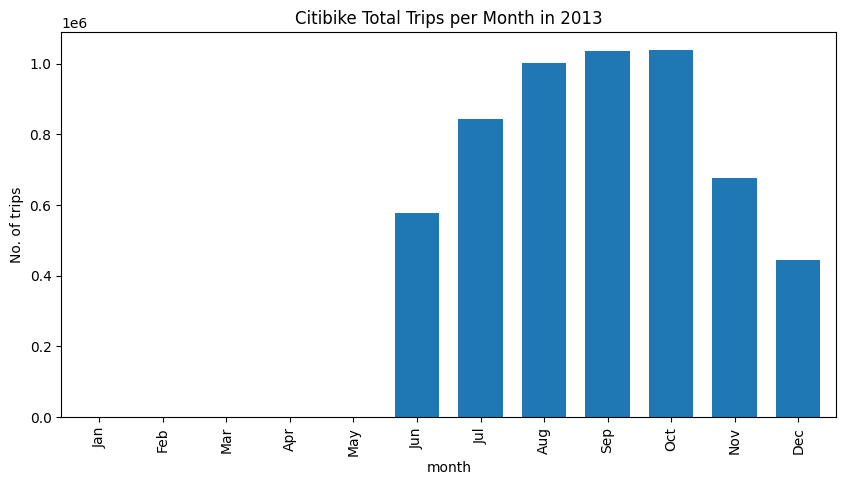

In [168]:
plot_tripcount_monthly('2013', data_2013)

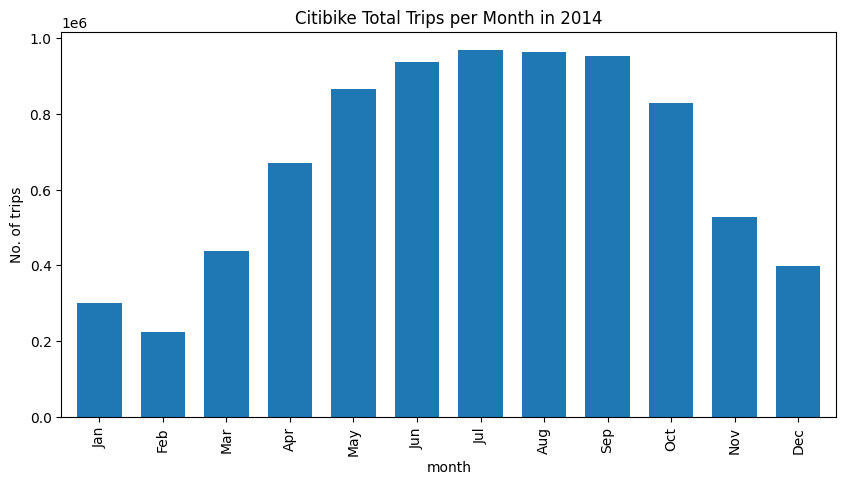

In [169]:
plot_tripcount_monthly('2014', data_2014)

In [152]:
data_2013

month
Aug    1001958
Dec     443966
Jul     843416
Jun     577703
Nov     675774
Oct    1037712
Sep    1034359
Name: count, dtype: int64

KeyError: 'month'

In [160]:
plot_tripcount_monthly('2014', data_2014)

KeyError: 'month'

In [110]:
# If month is not specified, plot over whole year
def plot_triphour(year: str, year_dict: dict,  month: str = ''):
    if month != '':
        df = year_dict[month]
    df_count = df["starttime"].groupby(df["starttime"].dt.hour).count()
    df_count.plot(kind="bar",  figsize=(10, 5), ylabel='count')

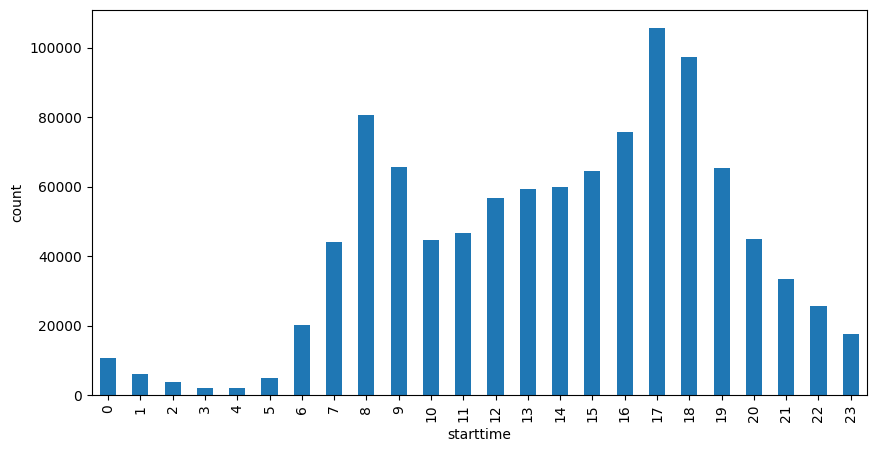

In [111]:
plot_triphour_month('2013', 'October', data_2013)

In [ ]:
plot_triphour_month('2014', 'October', data_2014)

In [44]:
print(data_2013['October'][1].head())

   tripduration            starttime             stoptime  start station id  \
0           326  2013-10-01 00:01:08  2013-10-01 00:06:34               239   
1           729  2013-10-01 00:01:21  2013-10-01 00:13:30               322   
2           520  2013-10-01 00:01:24  2013-10-01 00:10:04               174   
3           281  2013-10-01 00:01:25  2013-10-01 00:06:06               430   
4           196  2013-10-01 00:01:27  2013-10-01 00:04:43               403   

         start station name  start station latitude  start station longitude  \
0  Willoughby St & Fleet St               40.691966               -73.981302   
1   Clinton St & Tillary St               40.696192               -73.991218   
2           E 25 St & 1 Ave               40.738177               -73.977387   
3          York St & Jay St               40.701485               -73.986569   
4            E 2 St & 2 Ave               40.725029               -73.990697   

   end station id             end station na

In [10]:
print(data['October'][1].head())

   tripduration            starttime             stoptime  start station id  \
0           326  2013-10-01 00:01:08  2013-10-01 00:06:34               239   
1           729  2013-10-01 00:01:21  2013-10-01 00:13:30               322   
2           520  2013-10-01 00:01:24  2013-10-01 00:10:04               174   
3           281  2013-10-01 00:01:25  2013-10-01 00:06:06               430   
4           196  2013-10-01 00:01:27  2013-10-01 00:04:43               403   

         start station name  start station latitude  start station longitude  \
0  Willoughby St & Fleet St               40.691966               -73.981302   
1   Clinton St & Tillary St               40.696192               -73.991218   
2           E 25 St & 1 Ave               40.738177               -73.977387   
3          York St & Jay St               40.701485               -73.986569   
4            E 2 St & 2 Ave               40.725029               -73.990697   

   end station id             end station na

In [18]:
print(data_from_s3['October'][1].head())

   tripduration            starttime             stoptime  start station id  \
0           326  2013-10-01 00:01:08  2013-10-01 00:06:34               239   
1           729  2013-10-01 00:01:21  2013-10-01 00:13:30               322   
2           520  2013-10-01 00:01:24  2013-10-01 00:10:04               174   
3           281  2013-10-01 00:01:25  2013-10-01 00:06:06               430   
4           196  2013-10-01 00:01:27  2013-10-01 00:04:43               403   

         start station name  start station latitude  start station longitude  \
0  Willoughby St & Fleet St               40.691966               -73.981302   
1   Clinton St & Tillary St               40.696192               -73.991218   
2           E 25 St & 1 Ave               40.738177               -73.977387   
3          York St & Jay St               40.701485               -73.986569   
4            E 2 St & 2 Ave               40.725029               -73.990697   

   end station id             end station na

In [44]:
#citibike_data_path = './data/citibike/'
#path_to_file = '2013-citibike-tripdata.zip'
#"C:\Users\Joris\Projects\coding-challenge-AXA\data\tripdata\2013-citibike-tripdata.zip"
load_zip_csv_offline('tripdata', '2013-citibike-tripdata.zip')
load_zip_csv_url('tripdata', '2013-citibike-tripdata.zip')

2013-citibike-tripdata/201309-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201309-citibike-tripdata.csv
2013-citibike-tripdata/201311-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201311-citibike-tripdata.csv
2013-citibike-tripdata/201307-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201307-citibike-tripdata.csv
2013-citibike-tripdata/201308-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201308-citibike-tripdata.csv
2013-citibike-tripdata/201306-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201306-citibike-tripdata.csv
2013-citibike-tripdata/201310-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201310-citibike-tripdata.csv
2013-citibike-tripdata/201312-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201312-citibike-tripdata.csv
2013-citibike-tripdata/12_December/201312-citibike-tripdata_1.csv
2013-citibike-tripdata/11_November/201311-citibike-tripdata_1.csv
2013-citibike-tripdata/7_July/201307-citibike-tripdata_1.csv
20

In [47]:
for i in range(0, 12):
    load_zip_csv_offline('tripdata', f'{2013 + i}-citibike-tripdata.zip')

2013-citibike-tripdata/201309-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201309-citibike-tripdata.csv
2013-citibike-tripdata/201311-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201311-citibike-tripdata.csv
2013-citibike-tripdata/201307-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201307-citibike-tripdata.csv
2013-citibike-tripdata/201308-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201308-citibike-tripdata.csv
2013-citibike-tripdata/201306-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201306-citibike-tripdata.csv
2013-citibike-tripdata/201310-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201310-citibike-tripdata.csv
2013-citibike-tripdata/201312-citibike-tripdata.csv
__MACOSX/2013-citibike-tripdata/._201312-citibike-tripdata.csv
2013-citibike-tripdata/12_December/201312-citibike-tripdata_1.csv
2013-citibike-tripdata/11_November/201311-citibike-tripdata_1.csv
2013-citibike-tripdata/7_July/201307-citibike-tripdata_1.csv
20

FileNotFoundError: [Errno 2] No such file or directory: '../data/tripdata/2024-citibike-tripdata.zip'